In [1]:
from pythtb import TBModel, Lattice
import numpy as np

In [2]:
lat_vecs = [[1, 0], [1 / 2, np.sqrt(3) / 2]]
orb_vecs = [[1 / 3, 1 / 3], [2 / 3, 2 / 3]]
lat = Lattice(lat_vecs=lat_vecs, orb_vecs=orb_vecs, periodic_dirs=[0, 1])
model = TBModel(lattice=lat, spinful=False)

In [3]:
delta = 0
t1 = -1
t2 = 0.15
phi = np.pi / 2

model.set_onsite([-delta, delta], mode="set")

for lvec in ([0, 0], [-1, 0], [0, -1]):
    model.set_hop(t1, 0, 1, lvec, mode="set")

for lvec in ([1, 0], [-1, 1], [0, -1]):
    model.set_hop(t2 * np.exp(1j * phi), 0, 0, lvec, mode="set")
for lvec in ([-1, 0], [1, -1], [0, 1]):
    model.set_hop(t2 * np.exp(1j * phi), 1, 1, lvec, mode="set")

In [4]:
from pythtb.models import haldane

my_model = haldane(delta=0.1, t1=1.0, t2=0.1)

In [5]:
print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
periodic directions         = [0, 1]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000]
  # 1 ===> [ 0.500,  0.866]
Volume of unit cell (Cartesian) = 0.866 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283, -3.628]
  # 1 ===> [ 0.000,  7.255]
Volume of reciprocal unit cell = 45.586 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.500,  0.289]
  # 1 ===> [ 1.000,  0.577]

Orbital vectors (fractional):
  # 0 ===> [ 0.333,  0.333]
  # 1 ===> [ 0.667,  0.667]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -0.100 
  < 1 | H | 1 > =  0.100 
Hoppings:
  < 0 | H | 1  + [ 0.0 ,  0.0 ] > = 1.0000+0.0000j
  < 0 | H | 1  + [-1.0 ,  

(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

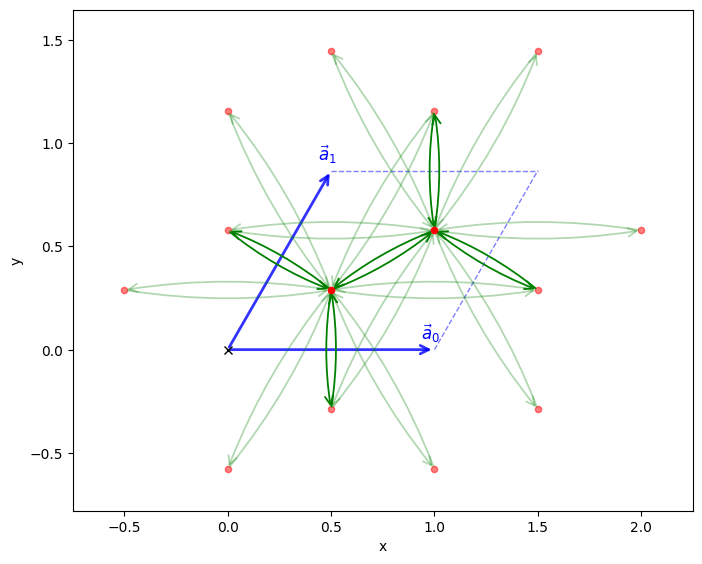

In [6]:
my_model.visualize()

In [7]:
# Generate k-points
nkx, nky = 20, 20
k_pts = my_model.k_uniform_mesh([nkx, nky])

In [8]:
H_k = my_model.hamiltonian(k_pts)

print("Hamiltonian shape:", H_k.shape)
print("Hamiltonian at first k-point:\n", H_k[0])
print("Hamiltonian at second k-point:\n", H_k[1])

Hamiltonian shape: (400, 2, 2)
Hamiltonian at first k-point:
 [[-0.1+0.j  3. +0.j]
 [ 3. +0.j  0.1+0.j]]
Hamiltonian at second k-point:
 [[-0.1       +0.j          2.96365774+0.00133535j]
 [ 2.96365774-0.00133535j  0.1       +0.j        ]]


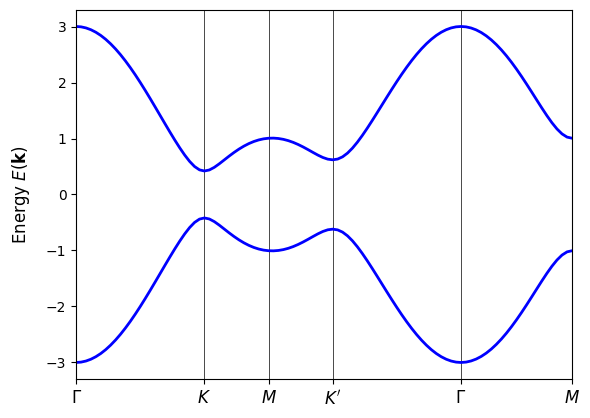

In [9]:
k_nodes = [[0, 0], [2 / 3, 1 / 3], [0.5, 0.5], [1 / 3, 2 / 3], [0, 0], [0.5, 0.5]]
k_label = (r"$\Gamma $", r"$K$", r"$M$", r"$K^\prime$", r"$\Gamma $", r"$M$")

fig, ax = my_model.plot_bands(k_nodes=k_nodes, k_node_labels=k_label)

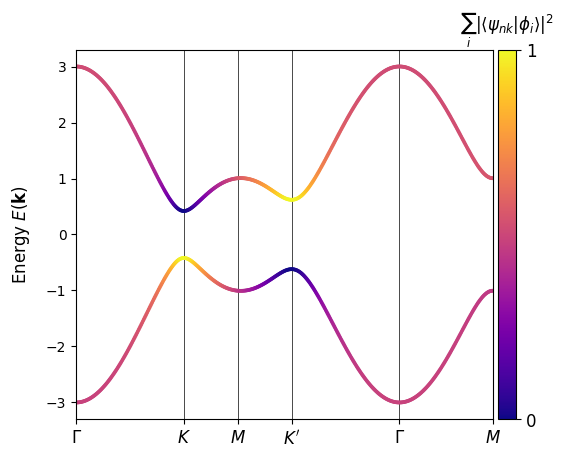

In [10]:
fig, ax = my_model.plot_bands(
    nk=500, k_nodes=k_nodes, k_node_labels=k_label, proj_orb_idx=[1]
)

In [11]:
from pythtb import tb_model
import numpy as np

In [12]:
# define lattice vectors
lat = [[1.0, 0.0], [0.5, np.sqrt(3.0) / 2.0]]
# define coordinates of orbitals
orb = [[1.0 / 3.0, 1.0 / 3.0], [2.0 / 3.0, 2.0 / 3.0]]

# make two dimensional tight-binding Haldane model
my_model = tb_model(2, 2, lat, orb)

# set model parameters
delta = 0.2
t = -1.0
t2 = 0.15 * np.exp((1.0j) * np.pi / 2.0)
t2c = t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2, 0, 0, [1, 0])
my_model.set_hop(t2, 1, 1, [1, -1])
my_model.set_hop(t2, 1, 1, [0, 1])
my_model.set_hop(t2c, 1, 1, [1, 0])
my_model.set_hop(t2c, 0, 0, [1, -1])
my_model.set_hop(t2c, 0, 0, [0, 1])

# print tight-binding model
my_model.display()

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
periodic directions         = [0, 1]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000]
  # 1 ===> [ 0.500,  0.866]
Volume of unit cell (Cartesian) = 0.866 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283, -3.628]
  # 1 ===> [ 0.000,  7.255]
Volume of reciprocal unit cell = 45.586 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.500,  0.289]
  # 1 ===> [ 1.000,  0.577]

Orbital vectors (fractional):
  # 0 ===> [ 0.333,  0.333]
  # 1 ===> [ 0.667,  0.667]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -0.200 
  < 1 | H | 1 > =  0.200 
Hoppings:
  < 0 | H | 1  + [ 0.0 ,  0.0 ] > = -1.0000+0.0000j
  < 1 | H | 0  + [ 1.0 , 

/var/folders/nn/m4t491h92ss8vwl56z761h6c0000gn/T/ipykernel_14506/2945160337.py:7: DeprecationWarning: pythtb.tb_model is deprecated and will be removed in a future release. Use TBModel instead.
  my_model = tb_model(2, 2, lat, orb)
/var/folders/nn/m4t491h92ss8vwl56z761h6c0000gn/T/ipykernel_14506/2945160337.py:31: FutureWarning: TBModel.display is deprecated and will be removed in a future release: The 'display()' method is deprecated and will be removed in a future release. Use 'print(model)' or 'model.info(show=True)' instead.
  my_model.display()
